In [48]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

In [49]:
#Read the flights
df = pd.read_csv('data/EDA_questions.csv')
df.head()

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,origin,origin_city_name,dest,dest_city_name,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,dep_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_delay
0,2019-02-12,DL,2070,DL,N915DN,GSP,"Greer, SC",ATL,"Atlanta, GA",1020,1126,66.0,153,-3.0,0.0,0.0,0.0,0.0,0.0,-5.0
1,2019-05-25,AS,1438,AS,N844VA,LAX,"Los Angeles, CA",SJC,"San Jose, CA",2005,2130,85.0,308,53.0,16.0,0.0,0.0,0.0,37.0,53.0
2,2018-01-02,DL,2297,DL,N922DX,JAX,"Jacksonville, FL",ATL,"Atlanta, GA",1540,1658,78.0,270,-5.0,0.0,0.0,0.0,0.0,0.0,-13.0
3,2019-11-24,UA,4808,ZW,N419AW,IAD,"Washington, DC",ALB,"Albany, NY",1715,1854,99.0,325,-11.0,0.0,0.0,0.0,0.0,0.0,-33.0
4,2018-07-17,AA,1815,AA,N703UW,CLT,"Charlotte, NC",DCA,"Washington, DC",1310,1437,87.0,331,-4.0,0.0,0.0,0.0,0.0,0.0,-12.0


#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [50]:
df['month'] = pd.DatetimeIndex(df['fl_date']).month
df['year'] = pd.DatetimeIndex(df['fl_date']).year
df.head(2)

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,origin,origin_city_name,dest,dest_city_name,crs_dep_time,...,distance,dep_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_delay,month,year
0,2019-02-12,DL,2070,DL,N915DN,GSP,"Greer, SC",ATL,"Atlanta, GA",1020,...,153,-3.0,0.0,0.0,0.0,0.0,0.0,-5.0,2,2019
1,2019-05-25,AS,1438,AS,N844VA,LAX,"Los Angeles, CA",SJC,"San Jose, CA",2005,...,308,53.0,16.0,0.0,0.0,0.0,37.0,53.0,5,2019


In [51]:
df['month_name']=df['month'].apply(lambda x: calendar.month_abbr[x])

In [52]:
df.groupby(['year','month_name']).size()

year  month_name
2018  Apr           6349
      Aug           6881
      Dec           6357
      Feb           5511
      Jan           5852
      Jul           6899
      Jun           6633
      Mar           6570
      May           6593
      Nov           6324
      Oct           6538
      Sep           6238
2019  Apr           6496
      Aug           7057
      Dec           6812
      Feb           5724
      Jan           6130
      Jul           7059
      Jun           6797
      Mar           6763
      May           6747
      Nov           6575
      Oct           6749
      Sep           6507
dtype: int64

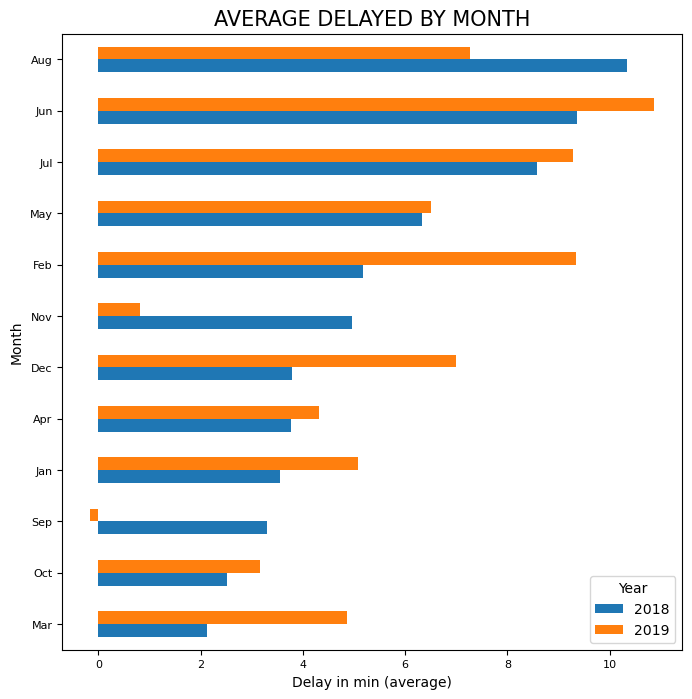

In [53]:

# Pivot the DataFrame and calculate the mean dep_delay
pivot_df = df.pivot_table(index='month_name', columns='year', values='arr_delay', aggfunc='mean')

# Sort the pivot table by dep_delay in descending order
pivot_df = pivot_df.sort_values(by=pivot_df.columns.tolist(), ascending=True)

# Create the horizontal bar plot
pivot_df.plot.barh(stacked=False, figsize=(8, 8))

plt.title('AVERAGE DELAYED BY MONTH', fontsize=15)
plt.xlabel('Delay in min (average)', fontsize=10)
plt.ylabel('Month', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.legend(title='Year')

plt.show()

In [45]:
#vertically bar graf
# # Pivot the DataFrame and calculate the mean dep_delay
# pivot_df = df.pivot_table(index='month_name', columns='year', values='dep_delay', aggfunc='mean')

# # Sort the pivot table by dep_delay in descending order
# pivot_df = pivot_df.sort_values(by=pivot_df.columns.tolist(), ascending=True)

# # Create the horizontal bar plot
# pivot_df.plot.bar(stacked=False, figsize=(8, 8))

# plt.title('AVERAGE DELAYED BY MONTH', fontsize=15)
# plt.xlabel('Delay in min (average)', fontsize=10)
# plt.ylabel('Month', fontsize=10)
# plt.xticks(fontsize=8)
# plt.yticks(rotation=0, fontsize=8)
# plt.legend(title='Year')

# plt.show()

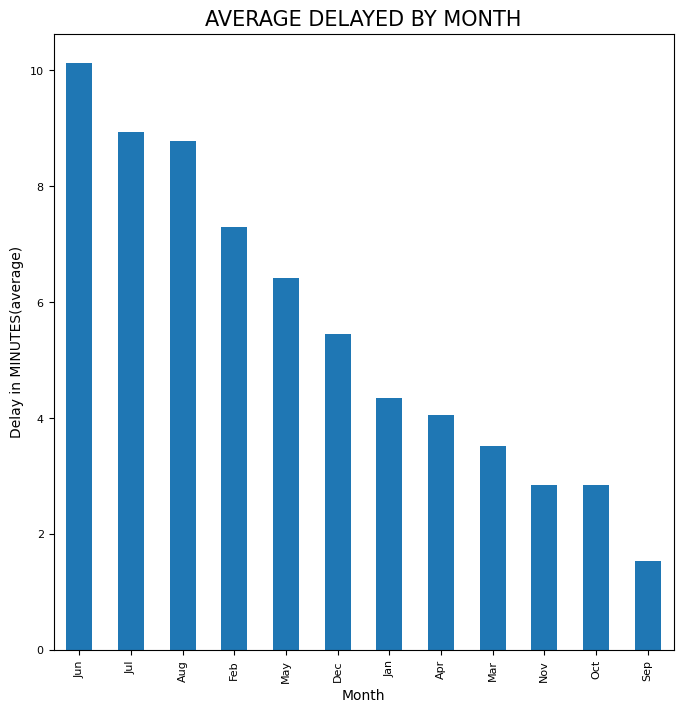

In [54]:
#total per months
plt.figure(figsize=(8,8))
df.groupby('month_name').arr_delay.mean().sort_values(ascending=False).plot.bar()
plt.title('AVERAGE DELAYED BY MONTH', fontsize=15)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Delay in MINUTES(average)', fontsize=10)
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
plt.show()

what could be the reason?

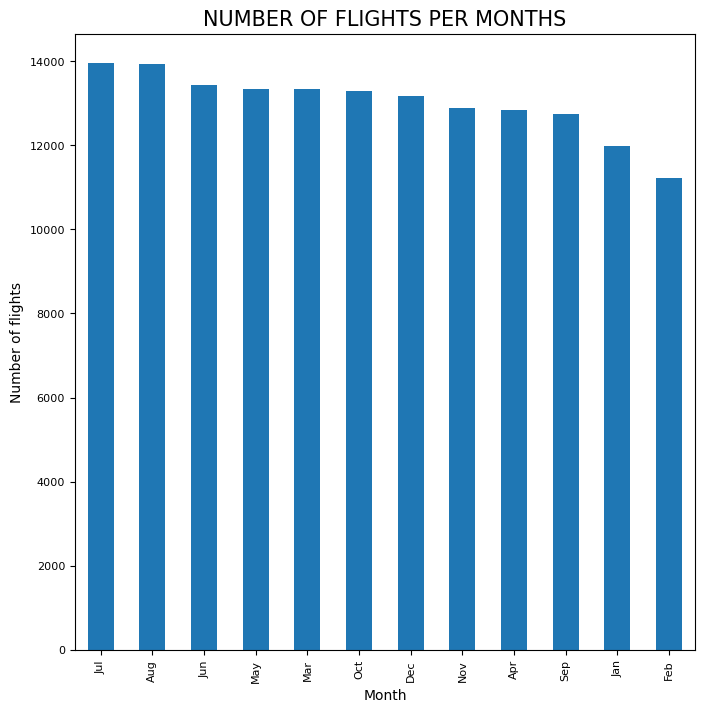

In [58]:
#total per months
plt.figure(figsize=(8,8))
df.groupby('month_name')['tail_num'].count().sort_values(ascending=False).plot.bar()
plt.title('NUMBER OF FLIGHTS PER MONTHS', fontsize=15)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Number of flights', fontsize=10)
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
plt.show()

The greatest traffic is then flights during the summer months and maybe that is the reason for the delay